In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
labels = {
    "cardboard" : 0,
    "glass" : 1,
    "metal" : 2,
    "paper" : 3,
    "plastic" : 4,
    "trash" : 5
}

In [5]:
import os
def get_image_paths(main_folder):
    image_paths = []
    for subdir, _, files in os.walk(main_folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_paths.append(os.path.join(subdir, file))
    return image_paths

In [6]:
train_img_paths = get_image_paths(r"/kaggle/input/trashnet-stanford/trashNet_Stanford/train")
val_img_paths = get_image_paths(r"/kaggle/input/trashnet-stanford/trashNet_Stanford/val")
test_img_paths = get_image_paths(r"/kaggle/input/trashnet-stanford/trashNet_Stanford/test")

print(len(train_img_paths))
print(len(val_img_paths))
print(len(test_img_paths))

1763
381
383


In [7]:
all_img_paths = train_img_paths + val_img_paths + test_img_paths
print(len(all_img_paths))

2527


In [8]:
import cv2
import numpy as np

def get_XY(all_path, target_size = (180, 180)):
    X = []
    Y = []
    for path in all_path:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        target = path.split("/")[-2]
        Y.append(labels[target])
        X.append(img)
        
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [9]:
X, Y = get_XY(all_img_paths)
print(X.shape)
print(Y.shape)

(2527, 180, 180, 3)
(2527,)


In [10]:
label_name = {}
for key, val in labels.items():
    label_name[val] = key
label_name

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [11]:
from matplotlib import pyplot as plt 

def show_img(img, label):
    print(label_name[label])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

paper


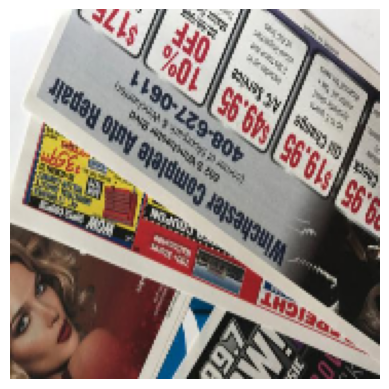

paper


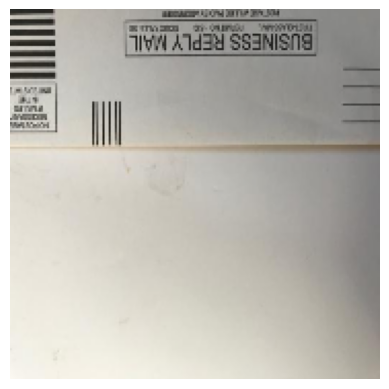

paper


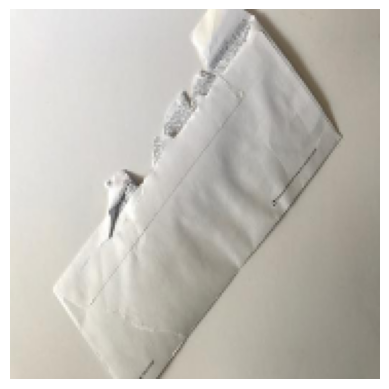

glass


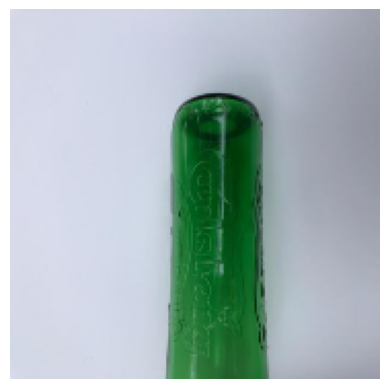

plastic


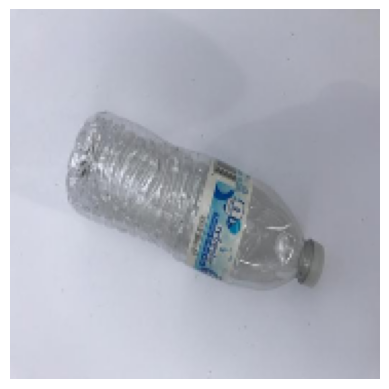

In [12]:
import random

random_indices = random.sample(range(X.shape[0]), 5)
for index in random_indices:
    show_img(X[index], Y[index])

In [13]:
num_classes = len(labels)
num_classes

6

In [14]:
from keras.utils import to_categorical

Y_one_hot = to_categorical(Y, num_classes=num_classes)
Y_one_hot.shape

(2527, 6)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y_one_hot, test_size=0.2, random_state=97)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=97)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(2021, 180, 180, 3) (2021, 6)
(253, 180, 180, 3) (253, 6)
(253, 180, 180, 3) (253, 6)


In [16]:
Y_train[1256]

array([0., 0., 1., 0., 0., 0.])

metal


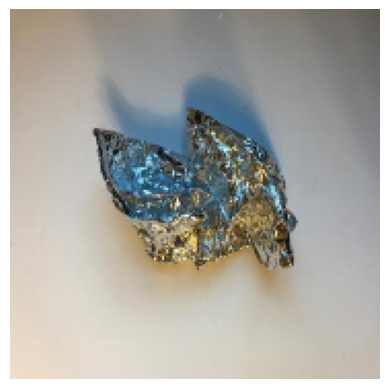

In [17]:
show_img(X_train[1256], 2)

In [32]:
# Define the model without transfer learning
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,657,014 (25.39 MB)

 Trainable params: 6,656,694 (25.39 MB)

 Non-trainable params: 320 (1.25 KB)

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [34]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
batch_size = 32

train_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size)
val_generator = val_test_datagen.flow(X_val, Y_val, batch_size=batch_size)
test_generator = val_test_datagen.flow(X_test, Y_test, batch_size=batch_size)

In [39]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(X_val) // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.3334 - loss: 1.6446 - val_accuracy: 0.1875 - val_loss: 1.7621
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4062 - loss: 1.4206 - val_accuracy: 0.2759 - val_loss: 1.7497
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - accuracy: 0.3518 - loss: 1.5864 - val_accuracy: 0.2455 - val_loss: 1.9272
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.3438 - loss: 1.6089 - val_accuracy: 0.3448 - val_loss: 1.9085
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.3432 - loss: 1.6327 - val_accuracy: 0.2143 - val_loss: 2.0052
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.4375 - loss: 1.5842 - val_accuracy: 0.2759 - val_loss: 2.0448
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 236ms/step - accuracy: 0.3994 - loss: 1.4908 - val_accuracy: 0.2500 - val_loss: 1.8541
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.2812 - loss: 1.7526 - val_accuracy

In [42]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(X_test) // batch_size)
print('Test accuracy:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4201 - loss: 1.5502
Test accuracy: 0.4464285671710968


In [55]:
our_model = Sequential()

resNet50 = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='avg',
    classes=num_classes,
)

for layer in resNet50.layers:
    layer.trainable = False

our_model.add(resNet50)
our_model.add(Flatten())
our_model.add(Dense(1024, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(512, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(256, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(128, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(64, activation = "relu"))
Dropout(0.1)
our_model.add(Dense(num_classes, activation = "softmax"))

our_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
our_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [57]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = our_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(X_val) // batch_size,
)

Epoch 1/50
 2/63 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.1562 - loss: 1.8054  

W0000 00:00:1720457447.749945     245 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12/63 ━━━━━━━━━━━━━━━━━━━━ 23s 466ms/step - accuracy: 0.1723 - loss: 1.8042

W0000 00:00:1720457452.761582     244 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.1858 - loss: 1.7763

W0000 00:00:1720457468.768667     242 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 346ms/step - accuracy: 0.1860 - loss: 1.7759 - val_accuracy: 0.2455 - val_loss: 1.7300
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2500 - loss: 1.7375 - val_accuracy: 0.1724 - val_loss: 1.6949
Epoch 3/50


W0000 00:00:1720457471.063284     245 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - accuracy: 0.2450 - loss: 1.7161 - val_accuracy: 0.1429 - val_loss: 1.7725
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1250 - loss: 1.7692 - val_accuracy: 0.2069 - val_loss: 1.7019
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - accuracy: 0.2160 - loss: 1.7211 - val_accuracy: 0.2455 - val_loss: 1.7171
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3750 - loss: 1.6600 - val_accuracy: 0.1724 - val_loss: 1.7742
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.2551 - loss: 1.6763 - val_accuracy: 0.2634 - val_loss: 1.7043
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.7042 - val_accuracy: 0.3793 - val_loss: 1.5228
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - accuracy: 0.2759 - loss: 1.6683 - val_accuracy: 0.2946 - val_loss: 1.6952
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.6835 - val_accuracy: 0.3448 - val_los

In [58]:
test_loss, test_acc = our_model.evaluate(test_generator, steps=len(X_test) // batch_size)
print('Test accuracy:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2798 - loss: 1.6063
Test accuracy: 0.2633928656578064
